In [1]:
#!pip install pandas
#!pip install tensorflow==2.10.1
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-09-09 23:51:58.471041: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 23:51:58.608170: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 23:51:58.686868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 23:51:58.757068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 23:51:58.776971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-09 23:51:58.892146: I tensorflow/core/platform/cpu_feature_gu

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

### Storing the images into a dataset

In [4]:
TRAIN_DATA_DIR = os.environ.get('TRAIN_DATA_DIR')
VALID_DATA_DIR = os.environ.get('VALID_DATA_DIR')
TEST_DATA_DIR = os.environ.get('TEST_DATA_DIR')

# Load the training data
train_ds = image_dataset_from_directory(
    TRAIN_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)


Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.


2024-09-09 23:52:07.347338: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 1649 files belonging to 5 classes.


In [5]:
class_names = train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

IndexError: list index out of range

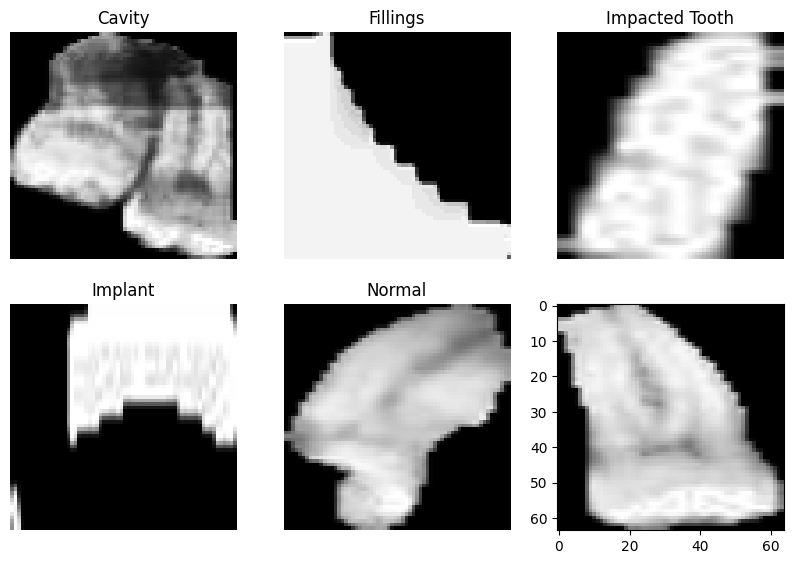

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
for i, element in enumerate(train_ds.as_numpy_iterator()):
    if i<1:
        print(element[0])
        print(element[1])
    else:
        break

### Data normalization,
Code not used in the preprocessing pipeline because the normalization is included in a layer of the model

In [7]:
train_ds_norm = train_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.08627451


In [8]:
test_ds_norm = test_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(test_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [9]:
val_ds_norm = val_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(val_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.92156863


Saving the datasets

In [10]:
#train_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train')
#test_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test')
#val_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')

Loading the dataset

In [11]:
#import tensorflow as tf

#new = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')
#new

In [12]:
#for i, element in enumerate(new.as_numpy_iterator()):
#    if i<1:
#        print(element[0])
#        print(element[1])
#    else:
#        break

## evaluate model

In [13]:
from tensorflow.keras.models import load_model

model = load_model('/home/enric/code/tdurova/starsmiles/models/model.keras')

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [15]:
metrics = model.evaluate(
        test_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9196 - loss: 0.2642
0.2776462435722351 0.9066100716590881


## Process and prediction

In [16]:
#!pip install Pillow

input_image = input('Enter path to image: ')

In [17]:
from tensorflow.keras.utils import img_to_array
from PIL import Image

image = Image.open(input_image)
img = img_to_array(image)
img.shape[2]

3

In [18]:
img.shape[:2]

(64, 64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


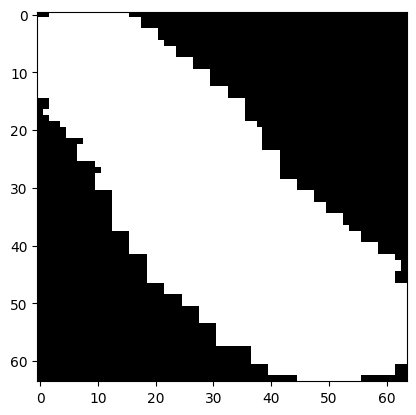

In [19]:
from tensorflow.keras.preprocessing.image import smart_resize

resized_im = smart_resize(img, (64,64))
plt.imshow(resized_im)

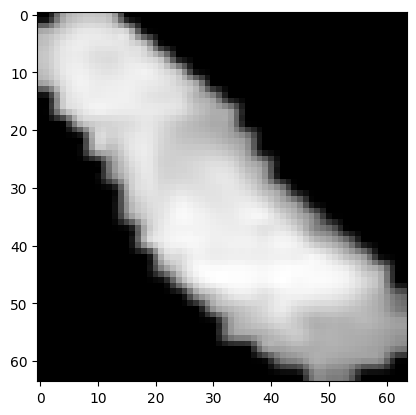

In [20]:
from tensorflow.image import rgb_to_grayscale

grey_res_im = rgb_to_grayscale(resized_im)
plt.imshow(grey_res_im, cmap='gray')

In [21]:
print(grey_res_im.shape, type(grey_res_im))

(64, 64, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [22]:
p = np.expand_dims(grey_res_im, axis=0)

pred = model.predict(p)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[3.21314514e-01, 1.22509815e-01, 1.91386076e-04, 1.08793518e-02,
        5.45105040e-01]], dtype=float32)

In [23]:
p.shape

(1, 64, 64, 1)

In [24]:
class_names= train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [25]:
threshold = 0.5
for i in range(len(class_names)):
    print(f'Probability of {class_names[i]}: {round(100*pred[0,i],2)}%')

    if pred[0,i]>threshold:
        threshold=pred[0,i]
        prediction = class_names[i]

print(f'Prediction is: {prediction}')


Probability of Cavity: 32.13%
Probability of Fillings: 12.25%
Probability of Impacted Tooth: 0.02%
Probability of Implant: 1.09%
Probability of Normal: 54.51%
Prediction is: Normal


# baseline model
Created by Tanja Durova

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model = Sequential()

# Define the input shape explicitly using Input
model.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model.add(layers.Rescaling(1./255))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model.add(layers.Dropout(0.5))

# Output Layer with Softmax
model.add(layers.Dense(5, activation="softmax"))

In [ ]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model.summary()

In [ ]:
MODEL = "model"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [ ]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=valid_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


In [106]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
plot_history(history)

# New model 1
Training the baseline model with a balanced dataset

In [78]:
from dotenv import load_dotenv
load_dotenv()

True

### Load datasets with balanced train and validation directories

In [81]:
TRAIN_BAL_DATA_DIR = os.environ.get('TRAIN_BAL_DATA_DIR')
VALID_BAL_DATA_DIR = os.environ.get('VALID_BAL_DATA_DIR')
TEST_BAL_DATA_DIR = os.environ.get('TEST_DATA_DIR')

# Load the training data
train_bal_ds = image_dataset_from_directory(
    TRAIN_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_bal_ds = image_dataset_from_directory(
    VALID_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_bal_ds = image_dataset_from_directory(
    TEST_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

Found 2140 files belonging to 5 classes.
Found 190 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [28]:
class_names = train_bal_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [29]:
#train_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/train')
#test_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/test')
#val_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/valid')

In [30]:
import tensorflow as tf

#train = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/train')
#test = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/test')
#valid = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/valid')

### Train baseline model with balanced data

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model1 = Sequential()

# Define the input shape explicitly using Input
model1.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model1.add(layers.Rescaling(1./255))

# First Convolutional Block
model1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model1.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model1.add(layers.Flatten())

# Fully Connected Dense Layer
model1.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model1.add(layers.Dropout(0.5))

# Output Layer with Softmax
model1.add(layers.Dense(5, activation="softmax"))

In [32]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model1.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,381 (911.64 KB)

 Trainable params: 233,381 (911.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras import callbacks

MODEL = "model1"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [104]:
%%time
history = model1.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4437 - loss: 1.3125
Epoch 1: val_loss did not improve from 0.77565
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4440 - loss: 1.3120 - val_accuracy: 0.5158 - val_loss: 1.1958 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4673 - loss: 1.2482
Epoch 2: val_loss did not improve from 0.77565
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.4676 - loss: 1.2475 - val_accuracy: 0.5368 - val_loss: 1.1152 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5090 - loss: 1.1823
Epoch 3: val_loss did not improve from 0.77565
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5094 - loss: 1.1816 - val_accuracy: 0.6000 - val_loss: 1.0377 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5619 - loss: 1.1129
Epoch 4: val_loss did not improve from 0.77565
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 

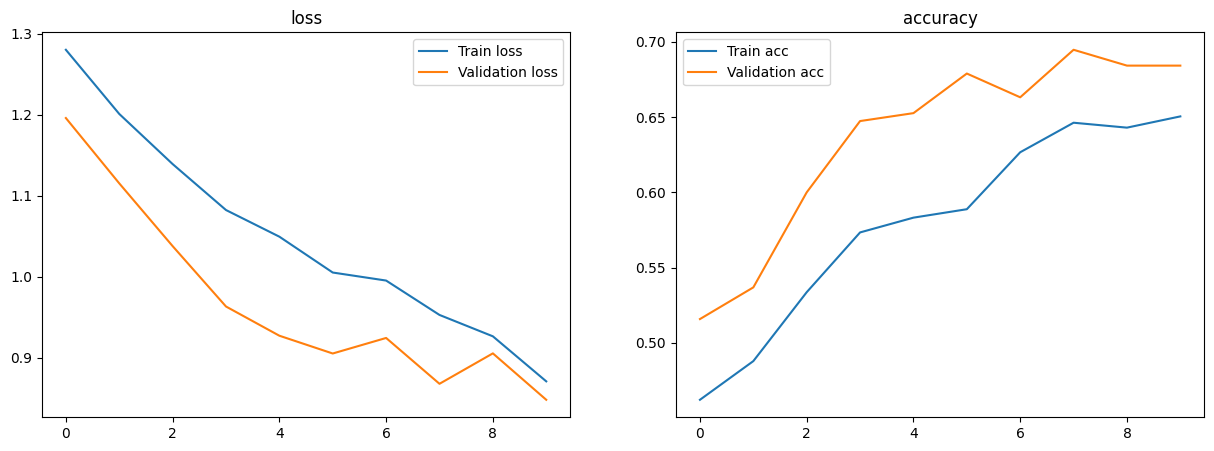

In [107]:
plot_history(history)

### Model evaluation

In [108]:
metrics = model1.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4938 - loss: 1.2003
1.1712919473648071 0.5118253231048584


# New model 2
Transfer learning

In [111]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model

In [133]:

en_model = EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    #input_tensor=None,
    input_shape=(64,64,3),
    pooling='Avg',
    #classes=1000,
    #classifier_activation='softmax',
    include_preprocessing=True
)

inputs = layers.Input(shape=(64,64,1))
x = en_model(inputs)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

pred = layers.Dense(5, activation="softmax")(x)

model2 = Model(inputs= inputs, outputs = pred )

# Freeze the EfficientNetV2B2 model
en_model.trainable = False


In [134]:
model2.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 2, 2, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5632)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,130,211 (34.83 MB)

 Trainable params: 360,837 (1.38 MB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [135]:
from tensorflow.keras import callbacks

MODEL = "model2"

modelCheckpoint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [136]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate = 0.001)

model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [137]:
%%time
history_2 = model2.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.3723 - loss: 1.4538 - val_accuracy: 0.6316 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5783 - loss: 1.0292 - val_accuracy: 0.6000 - val_loss: 1.0207 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6429 - loss: 0.9299 - val_accuracy: 0.6737 - val_loss: 0.9798 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.6736 - loss: 0.8376 - val_accuracy: 0.6684 - val_loss: 0.9453 - learning_rate: 0.0010
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7021 - loss: 0.7642 - val_accuracy: 0.6737 - val_loss: 0.9124 - learning_rate: 0.0010
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7368 - loss: 0.6862 - val_accuracy: 0.6737 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.7353 - loss: 0.6836 - val_a

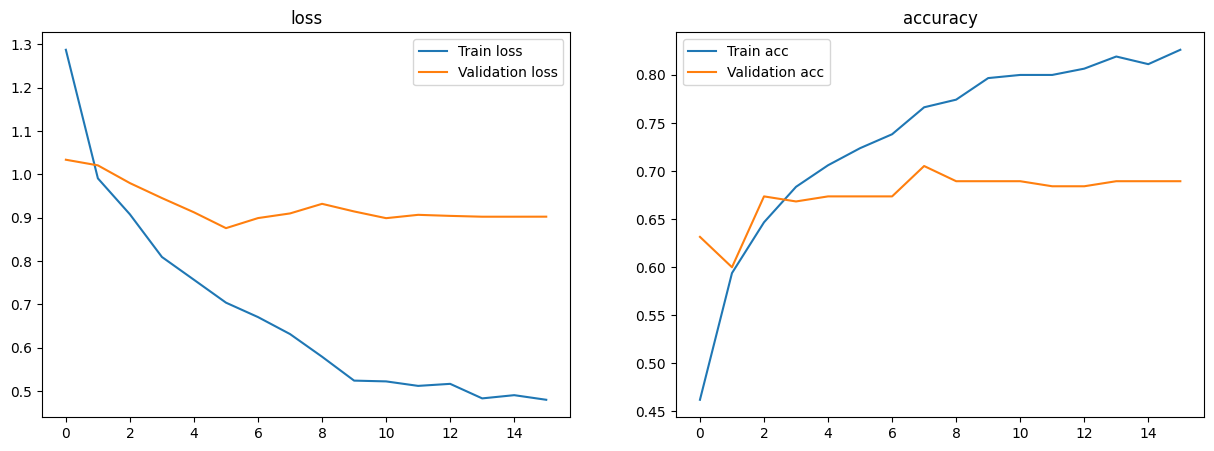

In [140]:
plot_history(history_2)

### evaluation

In [141]:
metrics = model2.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5475 - loss: 1.1044
1.0905345678329468 0.5542753338813782


In [142]:
model2.save('/home/enric/code/tdurova/starsmiles/models/model2.keras')

# New model 3
Resizing filters and kernel size

In [150]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model3 = Sequential()

# Define the input shape explicitly using Input
model3.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model3.add(layers.Rescaling(1./255))

# First Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model3.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model3.add(layers.Flatten())

# Fully Connected Dense Layer
model3.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model3.add(layers.Dropout(0.5))

# Output Layer with Softmax
model3.add(layers.Dense(5, activation="softmax"))

In [151]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model3.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,909 (859.02 KB)

 Trainable params: 219,909 (859.02 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
from tensorflow.keras import callbacks

MODEL = "model3"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [153]:
%%time
history3 = model3.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2947 - loss: 1.5614
Epoch 1: val_loss improved from inf to 1.27105, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.2955 - loss: 1.5605 - val_accuracy: 0.5000 - val_loss: 1.2711 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4610 - loss: 1.3160
Epoch 2: val_loss improved from 1.27105 to 1.07871, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.4613 - loss: 1.3153 - val_accuracy: 0.6105 - val_loss: 1.0787 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5299 - loss: 1.1970
Epoch 3: val_loss improved from 1.07871 to 0.98465, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5301 - loss: 1.1966 - val_accuracy: 0.6053 - val_loss: 0.9846 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5772 - loss: 1

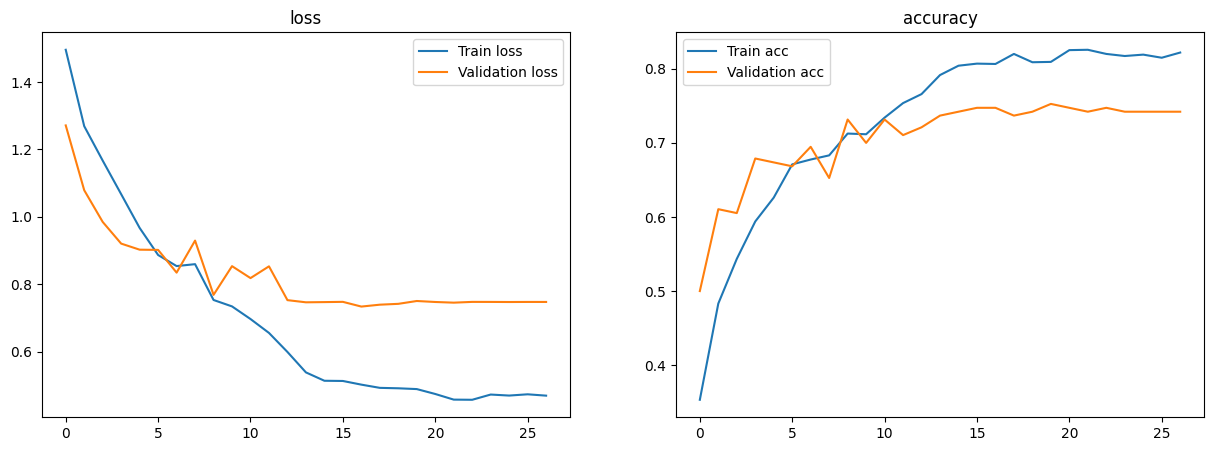

In [154]:
plot_history(history3)

### evaluation

In [155]:
metrics = model3.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5459 - loss: 1.0591
1.072924017906189 0.5506367683410645


In [ ]:
model3.save('/home/enric/code/tdurova/starsmiles/models/model3.keras')

# New model 4
Image reshape

In [157]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model4 = Sequential()

# Define the input shape explicitly using Input
model4.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model4.add(layers.Rescaling(1./255))
model4.add(layers.Resizing(132,132))

# First Convolutional Block
model4.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model4.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model4.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model4.add(layers.Flatten())

# Fully Connected Dense Layer
model4.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model4.add(layers.Dropout(0.5))

# Output Layer with Softmax
model4.add(layers.Dense(5, activation="softmax"))

In [158]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model4.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 132, 132, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 132, 132, 32)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 66, 66, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 66, 66, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 33, 33, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,213 (1.21 MB)

 Trainable params: 318,213 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
from tensorflow.keras import callbacks

MODEL = "model4"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [161]:
%%time
history4 = model4.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.2951 - loss: 1.5355
Epoch 1: val_loss improved from inf to 1.17885, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 498ms/step - accuracy: 0.2963 - loss: 1.5340 - val_accuracy: 0.5526 - val_loss: 1.1788 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5030 - loss: 1.2396
Epoch 2: val_loss improved from 1.17885 to 1.02196, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 514ms/step - accuracy: 0.5032 - loss: 1.2391 - val_accuracy: 0.6105 - val_loss: 1.0220 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.5656 - loss: 1.1344
Epoch 3: val_loss improved from 1.02196 to 0.92679, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 33s 497ms/step - accuracy: 0.5660 - loss: 1.1335 - val_accuracy: 0.6579 - val_loss: 0.9268 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.5987 - loss

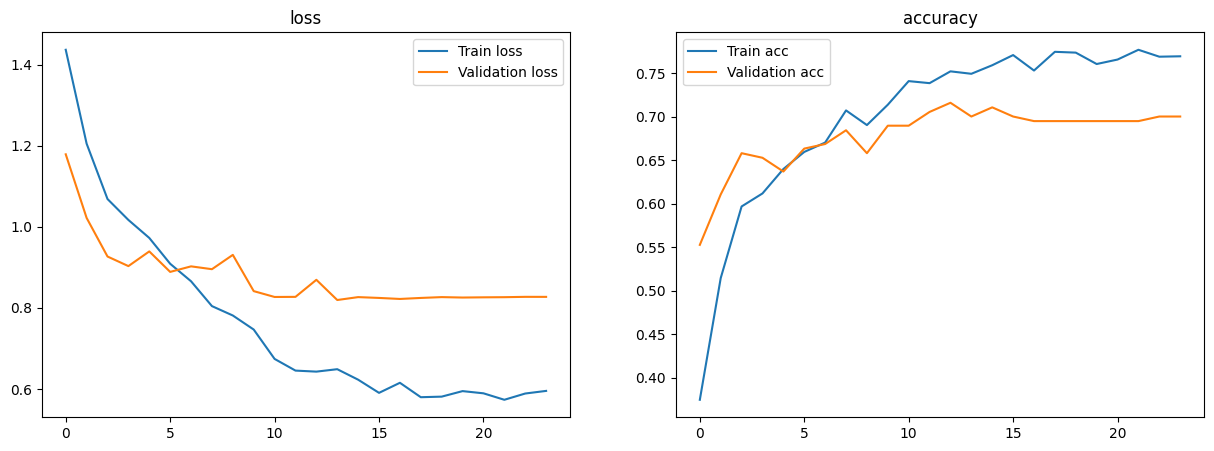

In [163]:
plot_history(history4)

### evaluation

In [164]:
metrics = model4.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.5038 - loss: 1.1462
1.1081844568252563 0.5106124877929688


## Confusion Matrix

Create the data (y_true and y_pred)

In [90]:
test_ds_0 = image_dataset_from_directory(
    TEST_BAL_DATA_DIR,
    label_mode='categorical',

Found 1649 files belonging to 5 classes.


In [84]:
l =list(test_ds_0)

y_t=[]
for i in range(len(l)):
    y_t.append(np.array(l[i][1]))

y_true = np.concatenate(y_t, axis=0)

2024-09-10 10:50:21.840755: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [85]:
y_p = model.predict(test_ds_0)

   1/1649 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step

1649/1649 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [86]:
y_pred = np.zeros((len(test_ds_0), 5))

for i, array in enumerate(y_p):
    for j, n in enumerate(array):
        if n==array.max():
            y_pred[i,j]=1

y_pred

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [87]:
idx = pd.from_dummies(pd.DataFrame(y_true))
col = pd.from_dummies(pd.DataFrame(y_pred))

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(idx, col)

array([[  2,   7,   0,   0,  13],
       [ 38,  89,  14,  21, 153],
       [  2,  10,   3,   0,  17],
       [ 13,  26,   3,  11,  51],
       [144, 249,  73,  88, 622]])